In [1]:
import numpy as np #고급수학
import pandas as pd #데이터프레임
import matplotlib.pyplot as plt #시각화
from sklearn.datasets import load_boston

#데이터 로더
boston = load_boston()

C:\Users\cksdu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


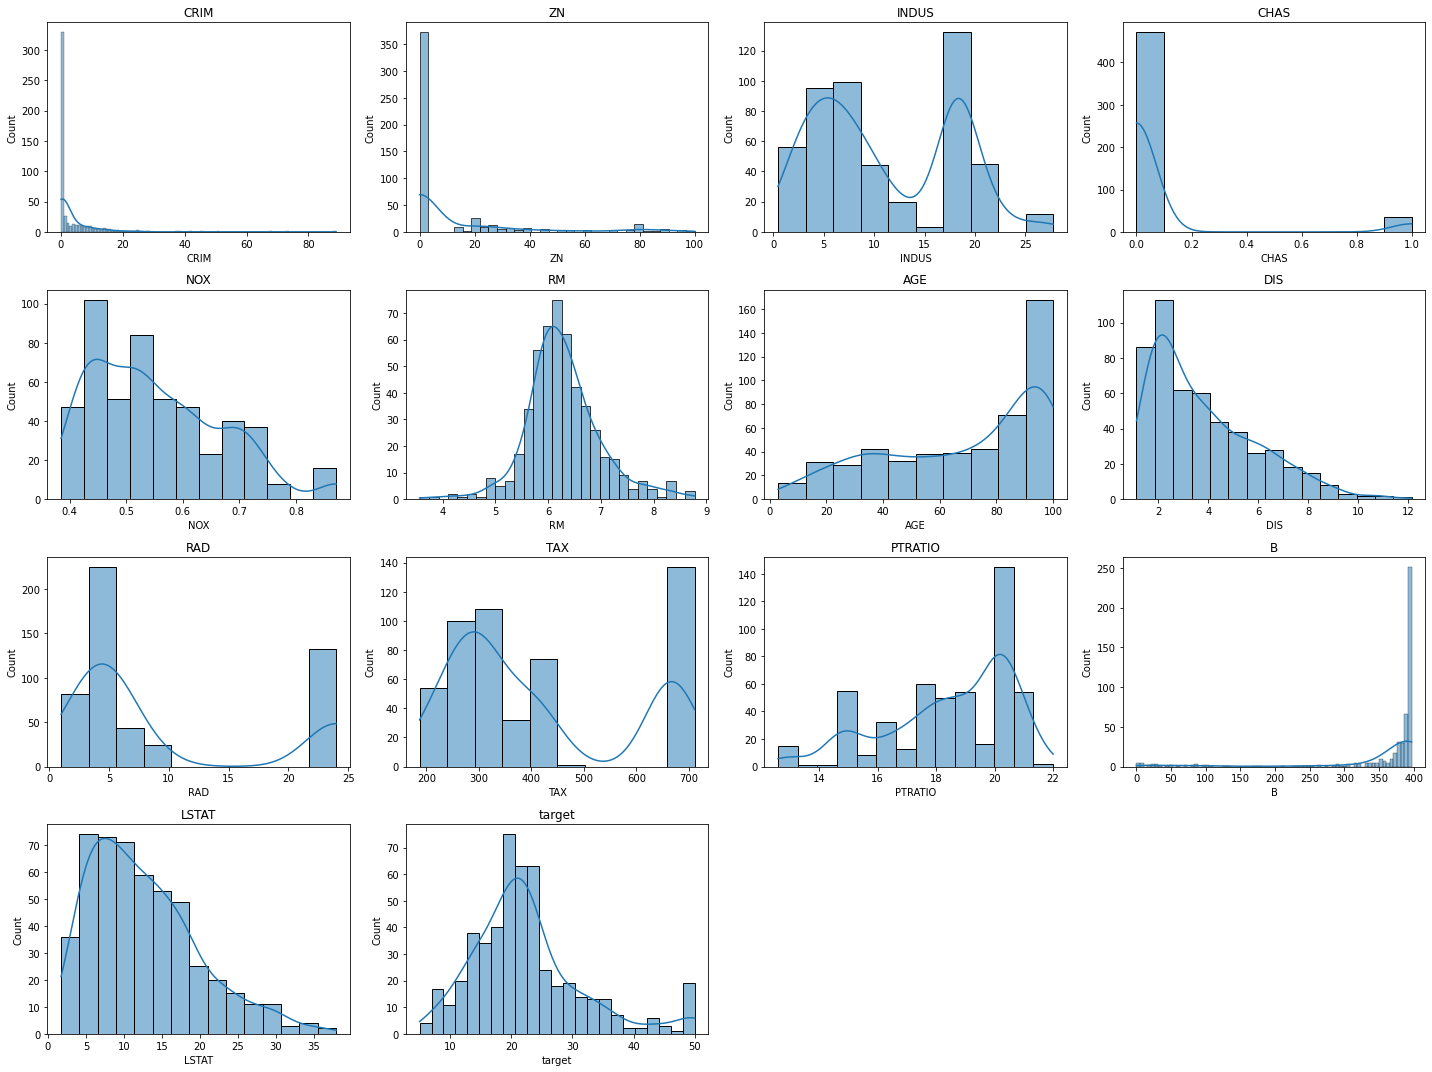

In [3]:
import seaborn as sns

plt.figure(figsize = (20, 15))

for i, col in enumerate(dataset.columns):
    plt.subplot(4,4,i+1)
    sns.histplot(dataset[col], kde = 'True')
    plt.title(col)

plt.tight_layout()
plt.show()

In [4]:
import statsmodels.api as sm

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y, X)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          6.72e-135
Time:                        09:15:11   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

정규화 하고 해보자

In [5]:
from sklearn.preprocessing import QuantileTransformer

# 분위수 변환 객체 생성
qt = QuantileTransformer(output_distribution='normal')

# RAD 변수에 대한 분위수 변환
rad_data = dataset['RAD'].values.reshape(-1, 1)  # 'RAD' 열을 2D 배열로 변환
rad_transformed = qt.fit_transform(rad_data)  # 분위수 변환 적용
dataset['RAD'] = rad_transformed

C:\Users\cksdu\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(


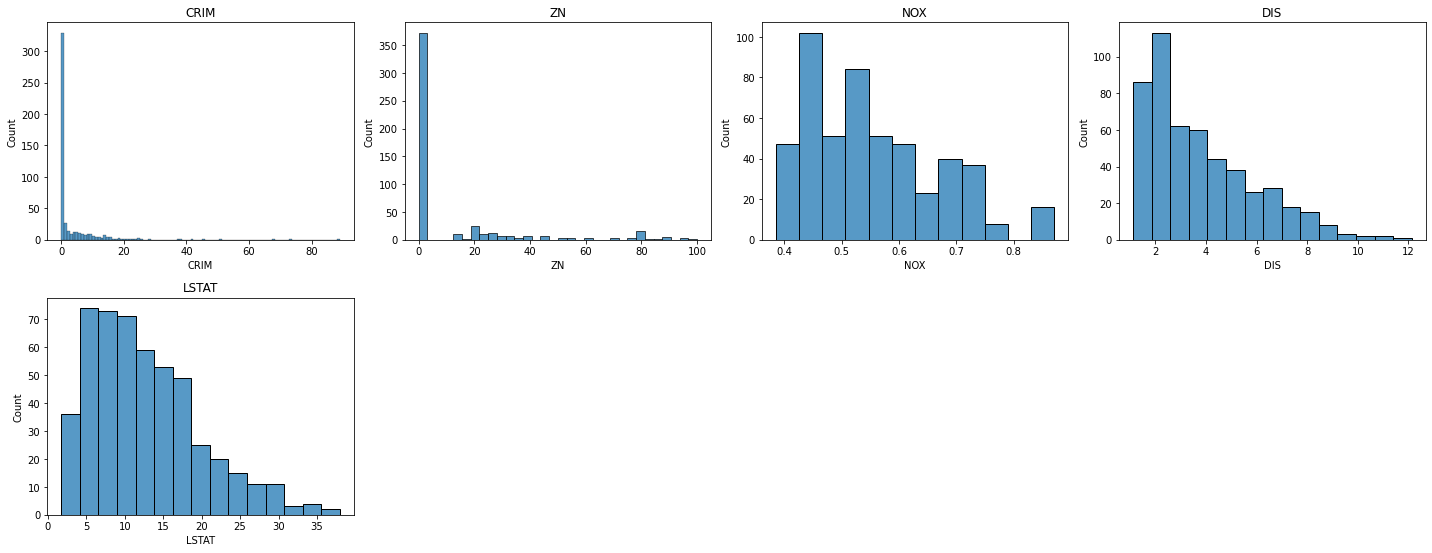

In [6]:
dataset[['CRIM', 'ZN', 'NOX', 'DIS', 'LSTAT']]
    
plt.figure(figsize = (20,15))
for i, col in enumerate(['CRIM', 'ZN', 'NOX', 'DIS', 'LSTAT']):
    plt.subplot(4,4,i+1)
    sns.histplot(dataset[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

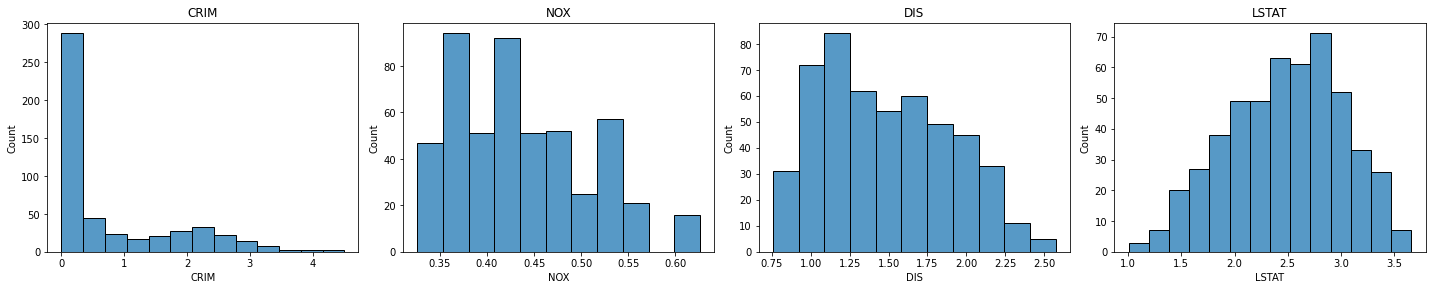

In [7]:
for col in ['CRIM', 'NOX', 'DIS', 'LSTAT']:
    dataset[col] = np.log(dataset[col] + 1)

plt.figure(figsize = (20,15))
for i, col in enumerate(['CRIM', 'NOX', 'DIS', 'LSTAT']):
    plt.subplot(4,4,i+1)
    sns.histplot(dataset[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

In [8]:
#dataset['B'] = np.exp(dataset['B'])

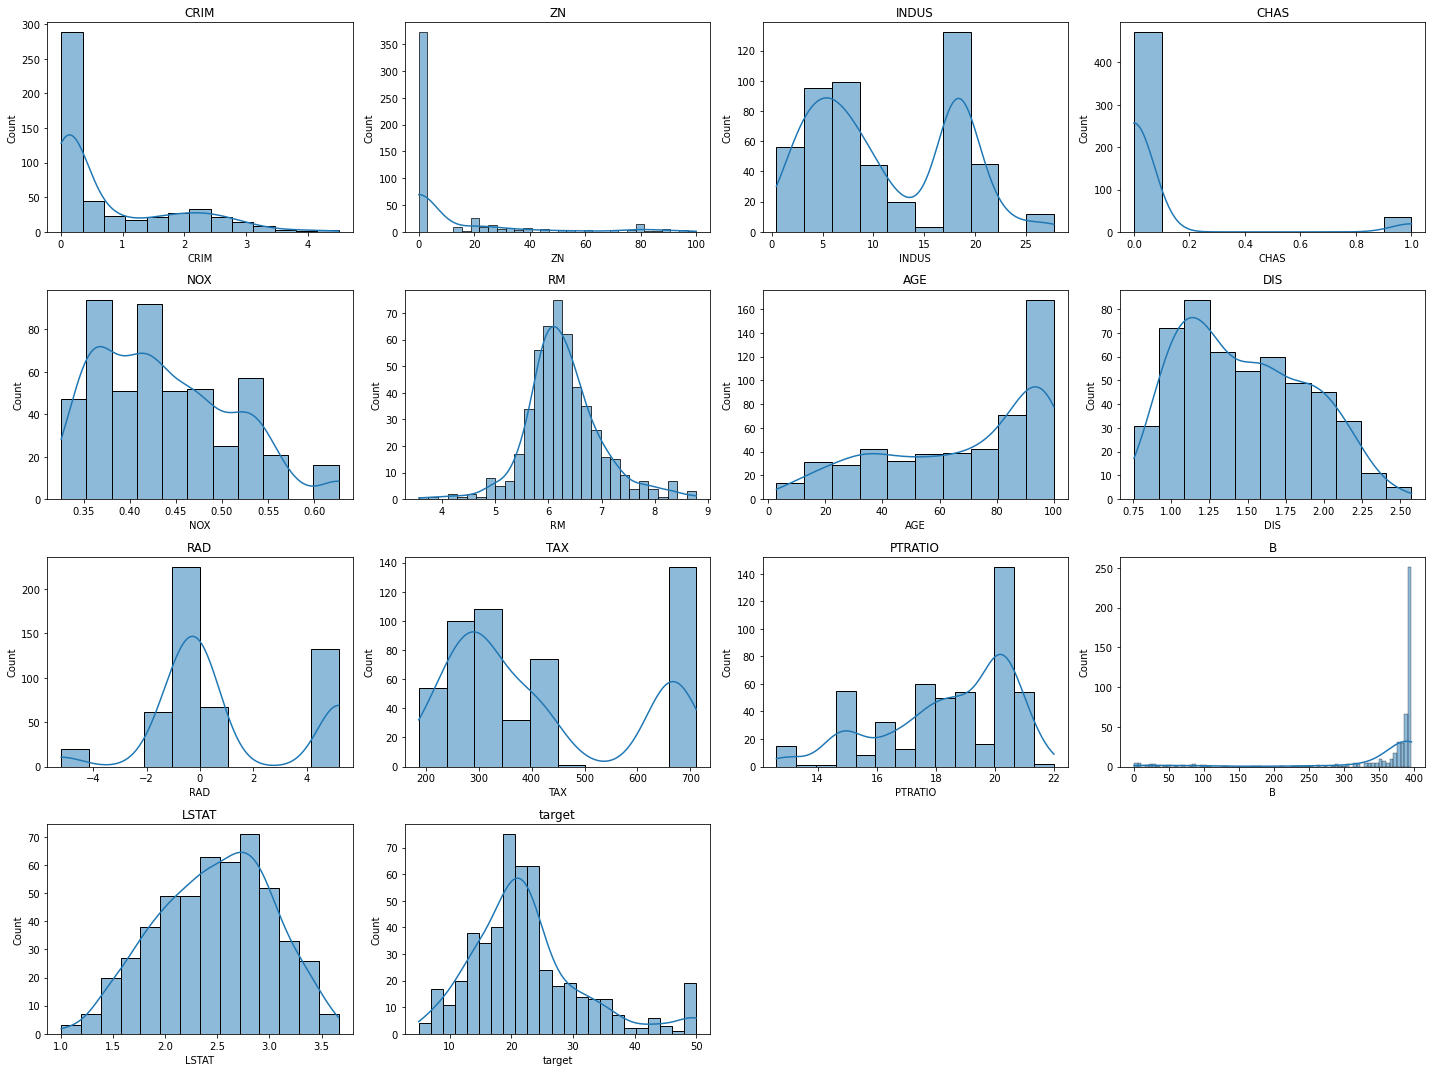

In [9]:
import seaborn as sns

plt.figure(figsize = (20, 15))

for i, col in enumerate(dataset.columns):
    plt.subplot(4,4,i+1)
    sns.histplot(dataset[col], kde = 'True')
    plt.title(col)

plt.tight_layout()
plt.show()

In [10]:
categorical_variable = dataset.drop(['CHAS', 'target'], axis = 1)
categorical_variable

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006300,18.0,2.31,0.430483,6.575,65.2,1.627278,-5.199338,296.0,15.3,396.90,1.788421
1,0.026944,0.0,7.07,0.384582,6.421,78.9,1.786261,-1.535128,242.0,17.8,396.90,2.316488
2,0.026924,0.0,7.07,0.384582,7.185,61.1,1.786261,-1.535128,242.0,17.8,392.83,1.615420
3,0.031857,0.0,2.18,0.377066,6.998,45.8,1.954757,-1.156382,222.0,18.7,394.63,1.371181
4,0.066770,0.0,2.18,0.377066,7.147,54.2,1.954757,-1.156382,222.0,18.7,396.90,1.845300
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.0,11.93,0.452985,6.593,69.1,1.246630,-5.199338,273.0,21.0,391.99,2.367436
502,0.044275,0.0,11.93,0.452985,6.120,76.7,1.190127,-5.199338,273.0,21.0,396.90,2.310553
503,0.058986,0.0,11.93,0.452985,6.976,91.0,1.152943,-5.199338,273.0,21.0,396.90,1.893112
504,0.103991,0.0,11.93,0.452985,6.794,89.3,1.220505,-5.199338,273.0,21.0,393.45,2.012233


In [11]:
import statsmodels.api as sm

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y, X)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     143.8
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          4.06e-158
Time:                        09:15:19   Log-Likelihood:                -1443.4
No. Observations:                 506   AIC:                             2915.
Df Residuals:                     492   BIC:                             2974.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.5884      5.607     12.232      0.000      57.571      79.606
CRIM          -1.3049      0.467     -2.793      0.005      -2.223      -0.387
ZN             0.0220      0.012      1.842      0.066      -0.001       0.045
INDUS         -0.0199      0.055     -0.365      0.715      -0.127       0.087
CHAS           2.4328      0.771      3.155      0.002       0.918       3.948
NOX          -27.9916      5.854     -4.781      0.000     -39.494     -16.489
RM             2.7374      0.388      7.048      0.000       1.974       3.501
AGE            0.0167      0.012      1.351      0.177      -0.008       0.041
DIS           -8.1747      1.026     -7.967      0.000     -10.191      -6.159
RAD            0.8783      0.165      5.334      0.000       0.555       1.202
TAX           -0.0084      0.003     -2.801      0.005      -0.014      -0.002
PTRATIO       -0.7780      0.115     -6.750      0.000      -1.004      -0.552
B              0.0071      0.002      2.905      0.004       0.002       0.012
LSTAT         -9.9904      0.646    -15.471      0.000     -11.259      -8.722
==============================================================================
Omnibus:                      121.626   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.786
Skew:                           1.049   Prob(JB):                    1.44e-100
Kurtosis:                       7.173   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

유의하지 않은 변수 제거

In [12]:
dataset = dataset.drop(['AGE','INDUS','ZN'], axis = 1)
dataset

,CRIM,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.006300,0.0,0.430483,6.575,1.627278,-5.199338,296.0,15.3,396.90,1.788421,24.0
1,0.026944,0.0,0.384582,6.421,1.786261,-1.535128,242.0,17.8,396.90,2.316488,21.6
2,0.026924,0.0,0.384582,7.185,1.786261,-1.535128,242.0,17.8,392.83,1.615420,34.7
3,0.031857,0.0,0.377066,6.998,1.954757,-1.156382,222.0,18.7,394.63,1.371181,33.4
4,0.066770,0.0,0.377066,7.147,1.954757,-1.156382,222.0,18.7,396.90,1.845300,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.060747,0.0,0.452985,6.593,1.246630,-5.199338,273.0,21.0,391.99,2.367436,22.4
502,0.044275,0.0,0.452985,6.120,1.190127,-5.199338,273.0,21.0,396.90,2.310553,20.6
503,0.058986,0.0,0.452985,6.976,1.152943,-5.199338,273.0,21.0,396.90,1.893112,23.9
504,0.103991,0.0,0.452985,6.794,1.220505,-5.199338,273.0,21.0,393.45,2.012233,22.0


In [13]:
import statsmodels.api as sm

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y, X)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     185.6
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          2.16e-160
Time:                        09:15:19   Log-Likelihood:                -1446.1
No. Observations:                 506   AIC:                             2914.
Df Residuals:                     495   BIC:                             2961.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.6172      5.581     12.294      0.000      57.652      79.583
CRIM          -1.1449      0.460     -2.487      0.013      -2.049      -0.240
CHAS           2.4517      0.767      3.195      0.001       0.944       3.960
NOX          -28.3426      5.543     -5.113      0.000     -39.234     -17.451
RM             2.9256      0.373      7.837      0.000       2.192       3.659
DIS           -7.9412      0.862     -9.213      0.000      -9.635      -6.248
RAD            0.8185      0.159      5.140      0.000       0.506       1.131
TAX           -0.0077      0.003     -2.889      0.004      -0.013      -0.002
PTRATIO       -0.8429      0.108     -7.823      0.000      -1.055      -0.631
B              0.0074      0.002      3.039      0.002       0.003       0.012
LSTAT         -9.7898      0.592    -16.530      0.000     -10.953      -8.626
==============================================================================
Omnibus:                      126.704   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.831
Skew:                           1.087   Prob(JB):                    2.61e-107
Kurtosis:                       7.308   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

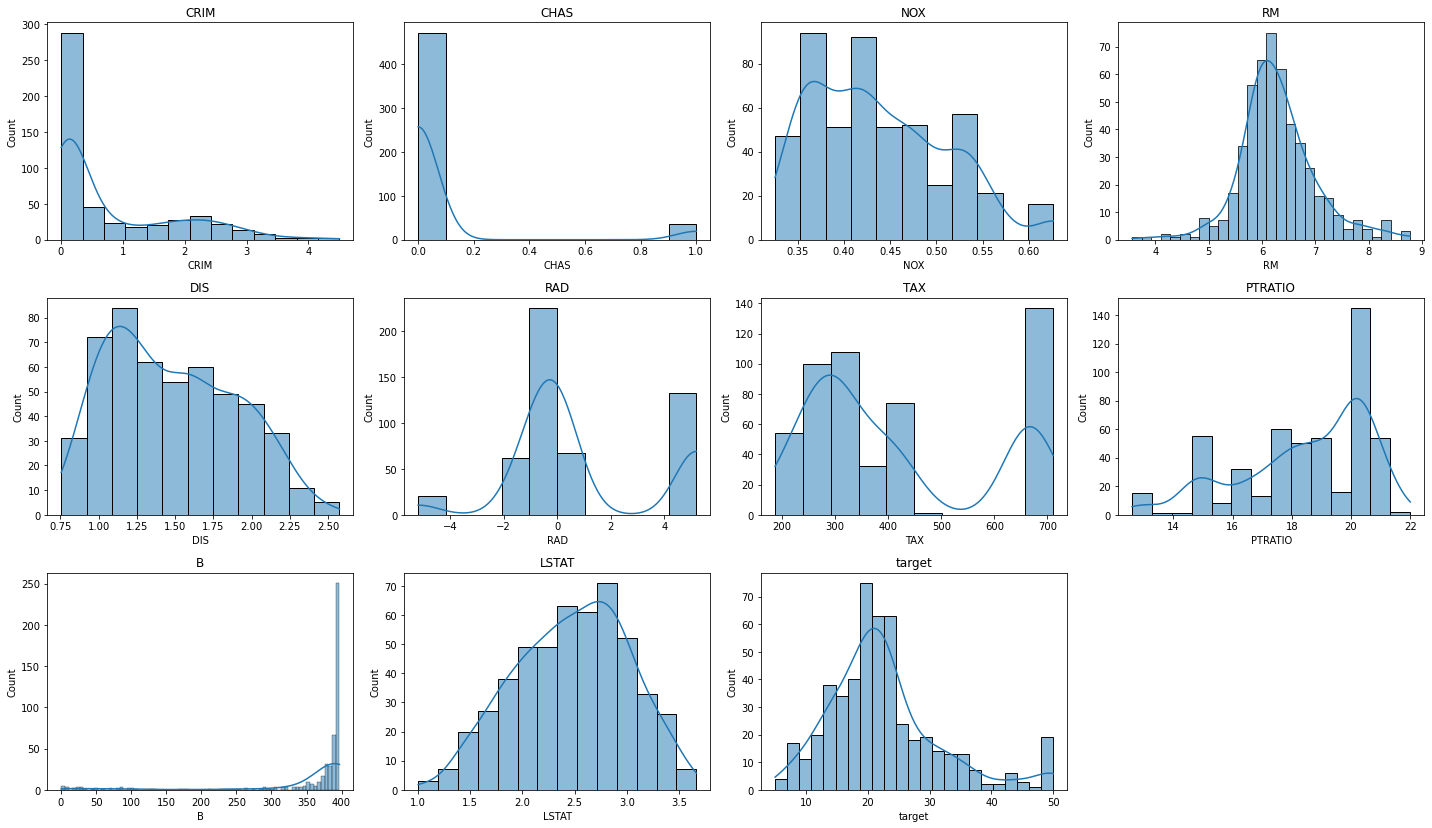

In [14]:
import seaborn as sns

plt.figure(figsize = (20, 15))

for i, col in enumerate(dataset.columns):
    plt.subplot(4,4,i+1)
    sns.histplot(dataset[col], kde = 'True')
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

# 데이터 준비: X는 독립 변수, y는 종속 변수

# RLM 모델 생성 및 피팅
model = RLM(y, X, M=sm.robust.norms.HuberT())
robust_results = model.fit()

# 결과 요약 테이블 출력
print(robust_results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 target   No. Observations:                  506
Model:                            RLM   Df Residuals:                      495
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 29 Feb 2024                                         
Time:                        09:15:27                                         
No. Iterations:                    36                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.4984      4.510     10.752      0.0

이 전의 회귀분석에서 잔차 정규성 해결해보자

In [16]:
residuals = lr.resid
residuals

0     -4.739355
1     -2.840851
2      1.190941
3     -0.540831
4      6.487864
         ...   
501    1.617724
502    0.140599
503   -3.428819
504   -3.016483
505   -9.025883
Length: 506, dtype: float64

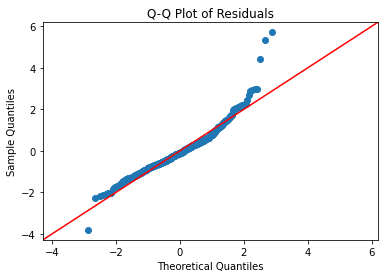

In [17]:
# Q-Q 플롯으로 잔차의 정규성 확인
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [18]:
import statsmodels.api as sm
import numpy as np

# 모델이 이미 피팅되었다고 가정하고 robust_results를 사용합니다.
influence = lr.get_influence()

# Cook's distance 값과 p-value를 계산합니다.
(c, p) = influence.cooks_distance

# Cook's distance가 높은 관측치의 인덱스를 찾습니다.
high_influence_points = np.where(c > 4 / len(c))[0]

# 이러한 관측치의 인덱스를 출력합니다.
print(high_influence_points)


[  7 148 152 160 166 186 214 225 233 253 257 262 267 283 284 349 364 365
 367 368 369 370 371 372 374 375 380 405 409 410 412 466 505]


In [19]:
dataset = dataset.drop(high_influence_points)

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y, X)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     273.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          8.44e-187
Time:                        09:15:27   Log-Likelihood:                -1206.0
No. Observations:                 473   AIC:                             2434.
Df Residuals:                     462   BIC:                             2480.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9573      4.862      9.452      0.000      36.403      55.512
CRIM          -0.9456      0.380     -2.487      0.013      -1.693      -0.199
CHAS           1.9146      0.627      3.051      0.002       0.682       3.148
NOX          -18.3237      4.344     -4.218      0.000     -26.860      -9.787
RM             3.9668      0.354     11.192      0.000       3.270       4.663
DIS           -5.3526      0.678     -7.892      0.000      -6.685      -4.020
RAD            0.6331      0.127      4.970      0.000       0.383       0.883
TAX           -0.0089      0.002     -4.436      0.000      -0.013      -0.005
PTRATIO       -0.7391      0.083     -8.938      0.000      -0.902      -0.577
B              0.0102      0.002      5.255      0.000       0.006       0.014
LSTAT         -7.7365      0.520    -14.887      0.000      -8.758      -6.715
==============================================================================
Omnibus:                       19.464   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.419
Skew:                           0.453   Prob(JB):                     2.23e-05
Kurtosis:                       3.517   Cond. No.                     2.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

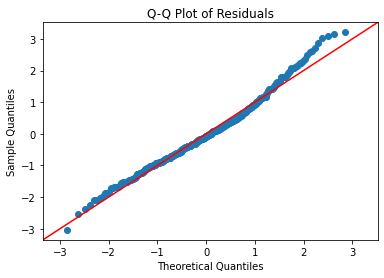

In [28]:
residuals = lr.resid
# Q-Q 플롯으로 잔차의 정규성 확인
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [29]:
# 모델이 이미 피팅되었다고 가정하고 robust_results를 사용합니다.
influence = lr.get_influence()

# Cook's distance 값과 p-value를 계산합니다.
(c, p) = influence.cooks_distance

# Cook's distance가 높은 관측치의 인덱스를 찾습니다.
high_influence_points = np.where(c > 4 / len(c))[0]

# 이러한 관측치의 인덱스를 출력합니다.
print(high_influence_points)


[ 63  97 140 151 152 154 157 158 159 175 176 189 197 198 203 220 250 269
 283 327 348 351 353 354 371 373 374 378 379 382 383 385 388]


In [30]:
try : 
    dataset = dataset.drop(high_influence_points)
except :
    pass

X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X = sm.add_constant(X)
model = sm.OLS(y, X)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     273.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          8.44e-187
Time:                        09:17:10   Log-Likelihood:                -1206.0
No. Observations:                 473   AIC:                             2434.
Df Residuals:                     462   BIC:                             2480.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9573      4.862      9.452      0.000      36.403      55.512
CRIM          -0.9456      0.380     -2.487      0.013      -1.693      -0.199
CHAS           1.9146      0.627      3.051      0.002       0.682       3.148
NOX          -18.3237      4.344     -4.218      0.000     -26.860      -9.787
RM             3.9668      0.354     11.192      0.000       3.270       4.663
DIS           -5.3526      0.678     -7.892      0.000      -6.685      -4.020
RAD            0.6331      0.127      4.970      0.000       0.383       0.883
TAX           -0.0089      0.002     -4.436      0.000      -0.013      -0.005
PTRATIO       -0.7391      0.083     -8.938      0.000      -0.902      -0.577
B              0.0102      0.002      5.255      0.000       0.006       0.014
LSTAT         -7.7365      0.520    -14.887      0.000      -8.758      -6.715
==============================================================================
Omnibus:                       19.464   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.419
Skew:                           0.453   Prob(JB):                     2.23e-05
Kurtosis:                       3.517   Cond. No.                     2.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scalered = scaler.fit_transform(X)
X.iloc[:,:] = scalered
X.const = 1
X

,const,CRIM,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,-0.774717,-0.250841,-0.080494,0.507437,0.317383,-2.258280,-0.645757,-1.504516,0.431815,-1.331229
1,1,-0.753687,-0.250841,-0.712538,0.255316,0.711457,-0.889543,-0.971184,-0.322789,0.431815,-0.326275
2,1,-0.753707,-0.250841,-0.712538,1.506099,0.711457,-0.889543,-0.971184,-0.322789,0.386154,-1.660463
3,1,-0.748682,-0.250841,-0.816035,1.199952,1.129110,-0.748066,-1.091712,0.102633,0.406348,-2.125270
4,1,-0.713115,-0.250841,-0.816035,1.443887,1.129110,-0.748066,-1.091712,0.102633,0.431815,-1.222983
...,...,...,...,...,...,...,...,...,...,...,...
500,1,-0.574911,-0.250841,0.333996,-0.389721,-0.612208,-0.189499,-0.073247,0.338978,0.431815,0.460313
501,1,-0.719251,-0.250841,0.229349,0.536906,-0.626135,-2.258280,-0.784365,1.189822,0.376730,-0.229317
502,1,-0.736031,-0.250841,0.229349,-0.237466,-0.766188,-2.258280,-0.784365,1.189822,0.431815,-0.337569
503,1,-0.721045,-0.250841,0.229349,1.163935,-0.858359,-2.258280,-0.784365,1.189822,0.431815,-1.131993


In [40]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     273.0
Date:                Thu, 29 Feb 2024   Prob (F-statistic):          8.44e-187
Time:                        09:20:49   Log-Likelihood:                -1206.0
No. Observations:                 473   AIC:                             2434.
Df Residuals:                     462   BIC:                             2480.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8478      0.144    151.580      0.000      21.565      22.131
CRIM          -0.9282      0.373     -2.487      0.013      -1.662      -0.195
CHAS           0.4518      0.148      3.051      0.002       0.161       0.743
NOX           -1.3307      0.315     -4.218      0.000      -1.951      -0.711
RM             2.4230      0.217     11.192      0.000       1.998       2.848
DIS           -2.1594      0.274     -7.892      0.000      -2.697      -1.622
RAD            1.6949      0.341      4.970      0.000       1.025       2.365
TAX           -1.4826      0.334     -4.436      0.000      -2.139      -0.826
PTRATIO       -1.5637      0.175     -8.938      0.000      -1.907      -1.220
B              0.9066      0.173      5.255      0.000       0.568       1.246
LSTAT         -4.0653      0.273    -14.887      0.000      -4.602      -3.529
==============================================================================
Omnibus:                       19.464   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.419
Skew:                           0.453   Prob(JB):                     2.23e-05
Kurtosis:                       3.517   Cond. No.                         6.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 모델 평가

In [41]:
lr.predict()

array([28.39046593, 24.61929211, 33.03235903, 33.18286703, 30.0959653 ,
       27.40689487, 21.84038562, 13.27301828, 18.55929675, 18.91679937,
       20.82964601, 19.69545904, 20.04844394, 19.17765505, 19.60671444,
       21.42030323, 16.39165977, 15.39274769, 17.80017036, 12.26002529,
       16.99829511, 15.40138455, 13.61382448, 15.31717916, 12.90811054,
       15.16658884, 14.32615306, 19.19941963, 20.40585665, 11.71193554,
       17.28747729,  9.9848712 , 13.65356609, 13.18666937, 23.1530924 ,
       21.37927383, 22.8369013 , 22.26894075, 30.2102288 , 36.39010535,
       29.94093116, 26.33561677, 24.94016709, 22.62935309, 21.17945492,
       19.24823286, 17.57754317, 11.28761315, 16.70891767, 20.24260117,
       23.39178685, 28.9080695 , 23.73142032, 13.83097271, 31.48914289,
       25.22342778, 32.88555499, 22.98528106, 20.76020533, 17.25388713,
       17.55152015, 24.81851055, 23.16548273, 25.84954263, 29.18623631,
       21.88969737, 21.66068362, 17.09182217, 21.06921678, 25.94